Import Libraries

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

Load and Display Data

In [2]:
df = pd.read_csv('./../Dataset/StrongPassword.csv')
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


## EDA

### Dataset Overview

Total Records: 20400
Total Features: 34
Unique Classes (Users): 51
  subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
4    s002             1    5    0.1249       0.2317       0.1068  0.0895   

   DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   

   UD.n.l     H.l  DD.l.Return 

/tmp/ipykernel_136056/232954856.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


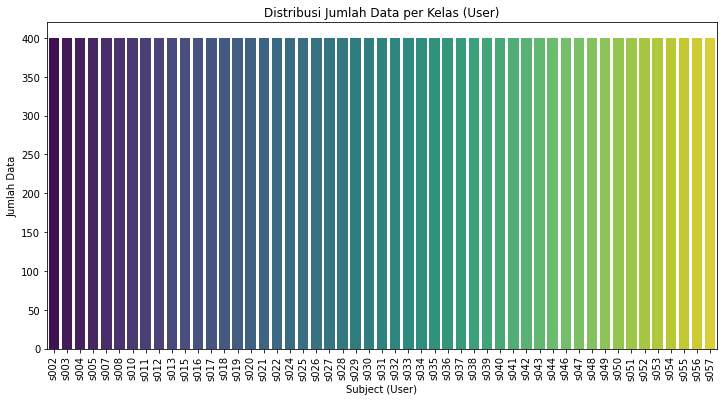

           H.period   DD.period.t   UD.period.t
count  20400.000000  20400.000000  20400.000000
mean       0.093379      0.264148      0.170769
std        0.029626      0.220534      0.226836
min        0.001400      0.018700     -0.235800
25%        0.074400      0.146900      0.049800
50%        0.089500      0.205950      0.108700
75%        0.107900      0.306450      0.212400
max        0.376100     12.506100     12.451700


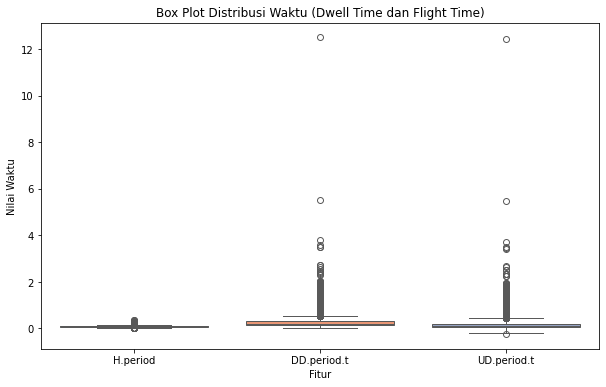

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

keystroke_df = df

# Total records, features, and unique classes
total_records = keystroke_df.shape[0]
total_features = keystroke_df.shape[1]
unique_classes = keystroke_df['subject'].nunique()

print(f"Total Records: {total_records}")
print(f"Total Features: {total_features}")
print(f"Unique Classes (Users): {unique_classes}")

# Sample rows
print(keystroke_df.head())

# Distribusi Data
class_distribution = keystroke_df['subject'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribusi Jumlah Data per Kelas (User)')
plt.xlabel('Subject (User)')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)
plt.show()

# Statistik Deskriptif
important_features = ['H.period', 'DD.period.t', 'UD.period.t']
print(keystroke_df[important_features].describe())

# Visualisasi Statistik Deskriptif
plt.figure(figsize=(10, 6))
sns.boxplot(data=keystroke_df[important_features], palette='Set2')
plt.title('Box Plot Distribusi Waktu (Dwell Time dan Flight Time)')
plt.ylabel('Nilai Waktu')
plt.xlabel('Fitur')
plt.show()


In [3]:
print("Shape of the dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Shape of the dataset: (20400, 34)
Missing values:
 subject            0
sessionIndex       0
rep                0
H.period           0
DD.period.t        0
UD.period.t        0
H.t                0
DD.t.i             0
UD.t.i             0
H.i                0
DD.i.e             0
UD.i.e             0
H.e                0
DD.e.five          0
UD.e.five          0
H.five             0
DD.five.Shift.r    0
UD.five.Shift.r    0
H.Shift.r          0
DD.Shift.r.o       0
UD.Shift.r.o       0
H.o                0
DD.o.a             0
UD.o.a             0
H.a                0
DD.a.n             0
UD.a.n             0
H.n                0
DD.n.l             0
UD.n.l             0
H.l                0
DD.l.Return        0
UD.l.Return        0
H.Return           0
dtype: int64
Data types:
 subject             object
sessionIndex         int64
rep                  int64
H.period           float64
DD.period.t        float64
UD.period.t        float64
H.t                float64
DD.t.i             f

### Descriptive

In [4]:
df.describe()

,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


### Feature Distributions

/home/crystallizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


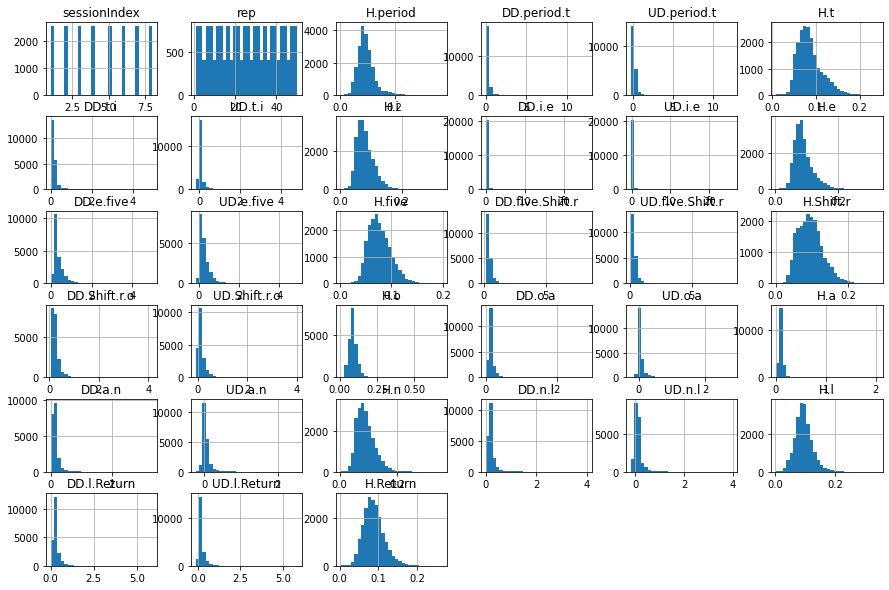

In [7]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Correlation Analysis

Non-numeric columns: Index(['subject'], dtype='object')


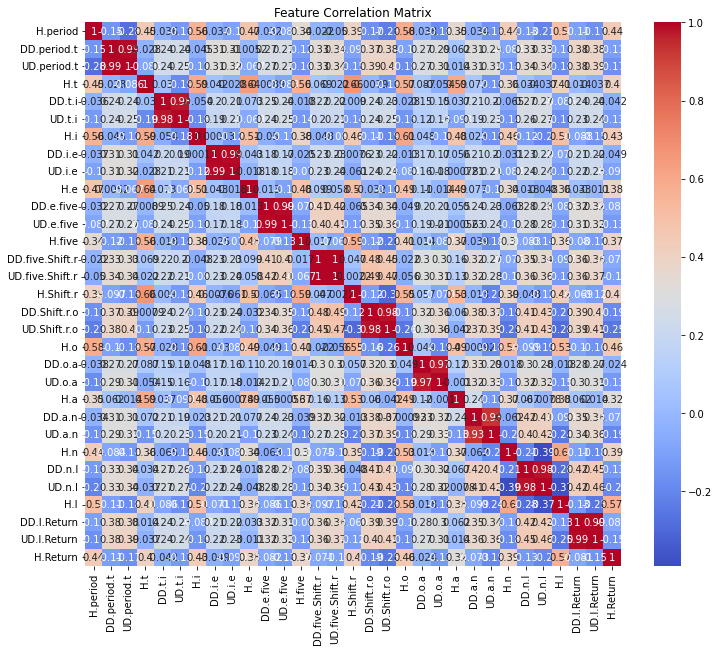

In [14]:
import seaborn as sns

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Exclude non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.drop("sessionIndex", axis='columns', inplace=True)
df_numeric.drop("rep", axis='columns', inplace=True)

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


### Session Varibility

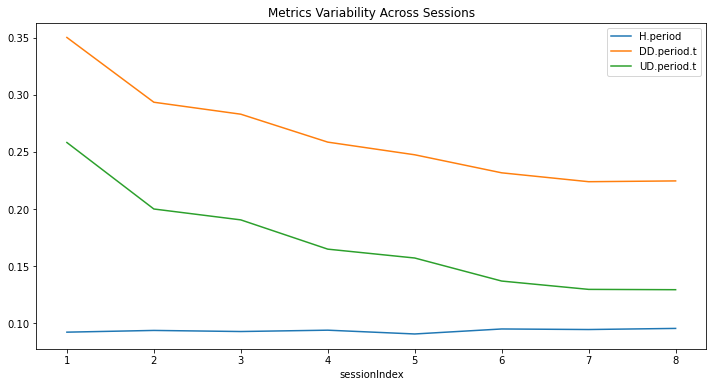

In [ ]:
session_variability = df.groupby('sessionIndex')[['H.period', 'DD.period.t', 'UD.period.t']].mean()
session_variability.plot(kind='line', figsize=(12, 6))
plt.title("Metrics Variability Across Sessions")
plt.show()

## Feature Extractions

Feature Extraction Functions

In [17]:
dwell_columns = [col for col in df.columns if col.startswith('H.')]
latency_columns = [col for col in df.columns if col.startswith('DD.')]
flight_columns = [col for col in df.columns if col.startswith('UD.')]

def extract_first_order_features(df):
    # Select relevant columns for first-order features
    dwell_times_df = df[dwell_columns]
    latency_df = df[latency_columns]
    flight_times_df = df[flight_columns]

    return pd.concat([dwell_times_df, latency_df, flight_times_df], axis=1)

def extract_second_order_features(first_order_df):
    # Calculate mean and standard deviation for each first-order feature type
    second_order_features = {
        'mean_dwell_time': first_order_df[dwell_columns].mean(axis=1),
        'std_dwell_time': first_order_df[dwell_columns].std(axis=1),
        'mean_latency': first_order_df[latency_columns].mean(axis=1),
        'std_latency': first_order_df[latency_columns].std(axis=1),
        'mean_flight_time': first_order_df[flight_columns].mean(axis=1),
        'std_flight_time': first_order_df[flight_columns].std(axis=1),
    }
    return pd.DataFrame(second_order_features)

Extract Features

In [18]:
first_order_df = extract_first_order_features(df)
second_order_df = extract_second_order_features(first_order_df)
combined_df = pd.concat([first_order_df, second_order_df], axis=1)

In [19]:
first_order_df

,H.period,H.t,H.i,H.e,H.five,H.Shift.r,H.o,H.a,H.n,H.l,...,UD.period.t,UD.t.i,UD.i.e,UD.e.five,UD.five.Shift.r,UD.Shift.r.o,UD.o.a,UD.a.n,UD.n.l,UD.l.Return
0,0.1491,0.1069,0.1169,0.1417,0.1146,0.1067,0.1016,0.1349,0.0932,0.1338,...,0.2488,0.0605,0.1043,1.0468,1.4909,0.6523,0.1120,0.0135,0.2583,0.2171
1,0.1111,0.0694,0.0908,0.0829,0.0689,0.1570,0.1066,0.1412,0.1146,0.0839,...,0.2340,0.0589,0.0449,1.1141,0.7133,0.6307,0.0618,0.1146,0.1496,0.1917
2,0.1328,0.0731,0.0821,0.0808,0.0892,0.1454,0.1365,0.1621,0.1172,0.1085,...,0.0744,0.0560,0.0721,0.9600,0.5311,0.5741,0.1566,0.0711,0.1533,0.1762
3,0.1291,0.1059,0.1040,0.0900,0.0913,0.1454,0.0956,0.1457,0.0866,0.0845,...,0.1224,0.1436,0.0998,0.9656,1.1651,0.6096,0.0574,0.0172,0.1475,0.2387
4,0.1249,0.0895,0.0903,0.0805,0.0742,0.1243,0.0430,0.1312,0.0884,0.0903,...,0.1068,0.0781,0.0686,0.7824,0.8213,0.6389,0.1545,0.0270,0.1633,0.1614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,0.0884,0.1095,0.0945,0.1328,0.1000,0.0863,0.0944,0.1219,0.0820,0.1005,...,-0.0199,0.0195,-0.0188,-0.0502,0.1398,0.1285,0.1122,0.0164,0.0509,0.1049
20396,0.0655,0.0910,0.0916,0.1256,0.0987,0.0892,0.0776,0.1008,0.1037,0.1445,...,-0.0025,0.0238,-0.0280,-0.0404,0.1454,0.0317,0.0201,-0.0496,-0.0169,0.0761
20397,0.0939,0.1008,0.0721,0.0903,0.0733,0.0742,0.0599,0.0913,0.0689,0.1034,...,0.0250,0.0114,-0.0259,0.1142,0.1457,0.0958,0.0505,0.0256,0.0622,0.0983
20398,0.0923,0.0913,0.0992,0.1016,0.0820,0.0729,0.0728,0.0882,0.0576,0.0979,...,0.0371,0.0077,-0.0095,-0.0446,0.2061,0.0873,0.0383,-0.0061,0.0121,0.0938


In [20]:
second_order_df

,mean_dwell_time,std_dwell_time,mean_latency,std_latency,mean_flight_time,std_flight_time
0,0.115782,0.022530,0.54039,0.493923,0.42045,0.492082
1,0.100100,0.029165,0.43400,0.361336,0.33136,0.363031
2,0.111109,0.029826,0.39526,0.298385,0.28249,0.304275
3,0.105400,0.023856,0.46450,0.405723,0.35669,0.410564
4,0.092582,0.025764,0.39389,0.311851,0.30023,0.315000
...,...,...,...,...,...,...
20395,0.101364,0.015347,0.14936,0.063340,0.04833,0.068961
20396,0.100727,0.022356,0.11479,0.066040,0.01597,0.059185
20397,0.083509,0.014318,0.14309,0.054281,0.06028,0.052993
20398,0.086264,0.013601,0.12780,0.069816,0.04222,0.071676


In [21]:
combined_df

,H.period,H.t,H.i,H.e,H.five,H.Shift.r,H.o,H.a,H.n,H.l,...,UD.o.a,UD.a.n,UD.n.l,UD.l.Return,mean_dwell_time,std_dwell_time,mean_latency,std_latency,mean_flight_time,std_flight_time
0,0.1491,0.1069,0.1169,0.1417,0.1146,0.1067,0.1016,0.1349,0.0932,0.1338,...,0.1120,0.0135,0.2583,0.2171,0.115782,0.022530,0.54039,0.493923,0.42045,0.492082
1,0.1111,0.0694,0.0908,0.0829,0.0689,0.1570,0.1066,0.1412,0.1146,0.0839,...,0.0618,0.1146,0.1496,0.1917,0.100100,0.029165,0.43400,0.361336,0.33136,0.363031
2,0.1328,0.0731,0.0821,0.0808,0.0892,0.1454,0.1365,0.1621,0.1172,0.1085,...,0.1566,0.0711,0.1533,0.1762,0.111109,0.029826,0.39526,0.298385,0.28249,0.304275
3,0.1291,0.1059,0.1040,0.0900,0.0913,0.1454,0.0956,0.1457,0.0866,0.0845,...,0.0574,0.0172,0.1475,0.2387,0.105400,0.023856,0.46450,0.405723,0.35669,0.410564
4,0.1249,0.0895,0.0903,0.0805,0.0742,0.1243,0.0430,0.1312,0.0884,0.0903,...,0.1545,0.0270,0.1633,0.1614,0.092582,0.025764,0.39389,0.311851,0.30023,0.315000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,0.0884,0.1095,0.0945,0.1328,0.1000,0.0863,0.0944,0.1219,0.0820,0.1005,...,0.1122,0.0164,0.0509,0.1049,0.101364,0.015347,0.14936,0.063340,0.04833,0.068961
20396,0.0655,0.0910,0.0916,0.1256,0.0987,0.0892,0.0776,0.1008,0.1037,0.1445,...,0.0201,-0.0496,-0.0169,0.0761,0.100727,0.022356,0.11479,0.066040,0.01597,0.059185
20397,0.0939,0.1008,0.0721,0.0903,0.0733,0.0742,0.0599,0.0913,0.0689,0.1034,...,0.0505,0.0256,0.0622,0.0983,0.083509,0.014318,0.14309,0.054281,0.06028,0.052993
20398,0.0923,0.0913,0.0992,0.1016,0.0820,0.0729,0.0728,0.0882,0.0576,0.0979,...,0.0383,-0.0061,0.0121,0.0938,0.086264,0.013601,0.12780,0.069816,0.04222,0.071676


## Visualisasi Hasil Ekstraksi Data

### Statistik Deskriptif

In [24]:
first_order_df.describe()

,H.period,H.t,H.i,H.e,H.five,H.Shift.r,H.o,H.a,H.n,H.l,...,UD.period.t,UD.t.i,UD.i.e,UD.e.five,UD.five.Shift.r,UD.Shift.r.o,UD.o.a,UD.a.n,UD.n.l,UD.l.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.093379,0.085727,0.081565,0.089138,0.076904,0.095937,0.088354,0.106259,0.089899,0.095589,...,0.170769,0.083358,0.077806,0.288295,0.361983,0.154984,0.068577,0.044411,0.112731,0.226259
std,0.029626,0.027424,0.026887,0.030635,0.021746,0.033900,0.026427,0.038828,0.030738,0.028348,...,0.226836,0.125755,0.228512,0.266695,0.260886,0.181619,0.108509,0.105197,0.159571,0.230759
min,0.001400,0.009300,0.003200,0.002100,0.001400,0.001400,0.006900,0.004000,0.003700,0.003700,...,-0.235800,-0.162100,-0.160000,-0.150500,0.085600,-0.086500,-0.228700,-0.235500,-0.175800,-0.124500
25%,0.074400,0.066000,0.062000,0.068600,0.061000,0.070200,0.071500,0.082100,0.067300,0.077400,...,0.049800,0.027200,0.007400,0.133200,0.229675,0.054700,0.017000,-0.009000,0.023500,0.114100
50%,0.089500,0.081000,0.077100,0.083400,0.074200,0.093500,0.086300,0.101900,0.085300,0.093700,...,0.108700,0.057800,0.041200,0.200400,0.302000,0.102200,0.044400,0.022700,0.095500,0.160300
75%,0.107900,0.099800,0.096900,0.102700,0.090600,0.116700,0.101900,0.122300,0.107900,0.111100,...,0.212400,0.096400,0.093400,0.369400,0.408900,0.191000,0.080300,0.068900,0.145700,0.255100
max,0.376100,0.241100,0.331200,0.325400,0.198900,0.281700,0.687200,2.035300,0.357700,0.340700,...,12.451700,4.799900,25.915800,4.882700,8.290800,4.012000,2.815200,2.524200,3.978200,5.836400


In [26]:
second_order_df.describe()

,mean_dwell_time,std_dwell_time,mean_latency,std_latency,mean_flight_time,std_flight_time
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.090096,0.021166,0.249192,0.149160,0.158917,0.153284
std,0.020964,0.009571,0.114365,0.125637,0.117679,0.125441
min,0.031591,0.002877,0.102220,0.034585,-0.021900,0.038867
25%,0.077334,0.015447,0.177830,0.084482,0.086960,0.088699
50%,0.088645,0.019911,0.220970,0.119026,0.131520,0.123000
75%,0.100773,0.025453,0.285372,0.175094,0.194455,0.180049
max,0.296936,0.577406,3.591670,7.925693,3.494000,7.935935


In [25]:
combined_df.describe()

,H.period,H.t,H.i,H.e,H.five,H.Shift.r,H.o,H.a,H.n,H.l,...,UD.o.a,UD.a.n,UD.n.l,UD.l.Return,mean_dwell_time,std_dwell_time,mean_latency,std_latency,mean_flight_time,std_flight_time
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.093379,0.085727,0.081565,0.089138,0.076904,0.095937,0.088354,0.106259,0.089899,0.095589,...,0.068577,0.044411,0.112731,0.226259,0.090096,0.021166,0.249192,0.149160,0.158917,0.153284
std,0.029626,0.027424,0.026887,0.030635,0.021746,0.033900,0.026427,0.038828,0.030738,0.028348,...,0.108509,0.105197,0.159571,0.230759,0.020964,0.009571,0.114365,0.125637,0.117679,0.125441
min,0.001400,0.009300,0.003200,0.002100,0.001400,0.001400,0.006900,0.004000,0.003700,0.003700,...,-0.228700,-0.235500,-0.175800,-0.124500,0.031591,0.002877,0.102220,0.034585,-0.021900,0.038867
25%,0.074400,0.066000,0.062000,0.068600,0.061000,0.070200,0.071500,0.082100,0.067300,0.077400,...,0.017000,-0.009000,0.023500,0.114100,0.077334,0.015447,0.177830,0.084482,0.086960,0.088699
50%,0.089500,0.081000,0.077100,0.083400,0.074200,0.093500,0.086300,0.101900,0.085300,0.093700,...,0.044400,0.022700,0.095500,0.160300,0.088645,0.019911,0.220970,0.119026,0.131520,0.123000
75%,0.107900,0.099800,0.096900,0.102700,0.090600,0.116700,0.101900,0.122300,0.107900,0.111100,...,0.080300,0.068900,0.145700,0.255100,0.100773,0.025453,0.285372,0.175094,0.194455,0.180049
max,0.376100,0.241100,0.331200,0.325400,0.198900,0.281700,0.687200,2.035300,0.357700,0.340700,...,2.815200,2.524200,3.978200,5.836400,0.296936,0.577406,3.591670,7.925693,3.494000,7.935935


### Korelasi Fitur

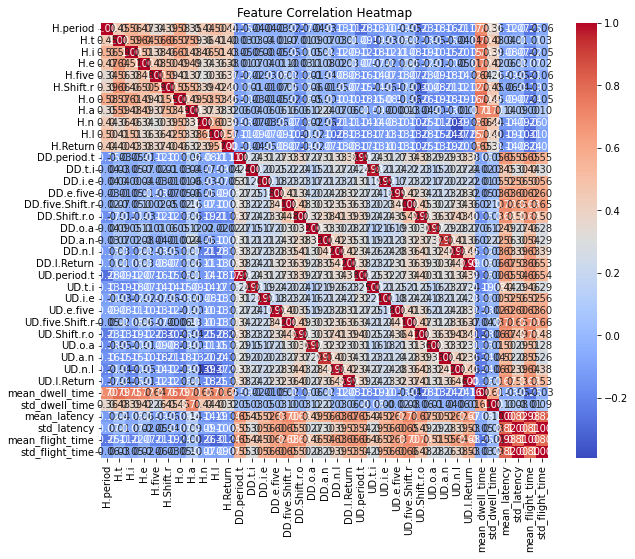

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
correlation_matrix = combined_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
